**Task 2.2**

In [1]:
pip install git+https://github.com/alemartinello/dstapi.git

  Cloning https://github.com/alemartinello/dstapi.git to /private/var/folders/71/b9kzpv3s4w5fd9kz2fr224x40000gn/T/pip-req-build-y9wa9byz
  Running command git clone --filter=blob:none --quiet https://github.com/alemartinello/dstapi.git /private/var/folders/71/b9kzpv3s4w5fd9kz2fr224x40000gn/T/pip-req-build-y9wa9byz
  Resolved https://github.com/alemartinello/dstapi.git to commit d9eeb5a82cbc70b7d63b2ff44d92632fd77123a4
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas_datareader


Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install fredapi


Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np
import pandas as pd
import dstapi as dst
import matplotlib.pyplot as plt
from fredapi import Fred
from pandas_datareader import data as pdr
from IPython.display import display

**Task 2.2.1 and 2.2.2**

/var/folders/71/b9kzpv3s4w5fd9kz2fr224x40000gn/T/ipykernel_46753/334737306.py:35: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  hicp_2019 = hicp_wide.groupby(axis=1, level=0).apply(norm_2019)
/var/folders/71/b9kzpv3s4w5fd9kz2fr224x40000gn/T/ipykernel_46753/334737306.py:39: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  hicp_yoy = hicp_wide.pct_change(12) * 100


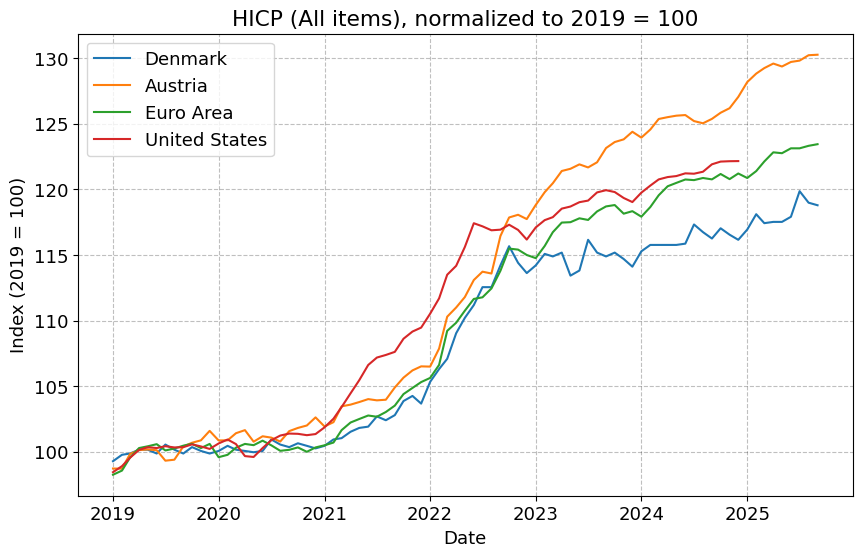

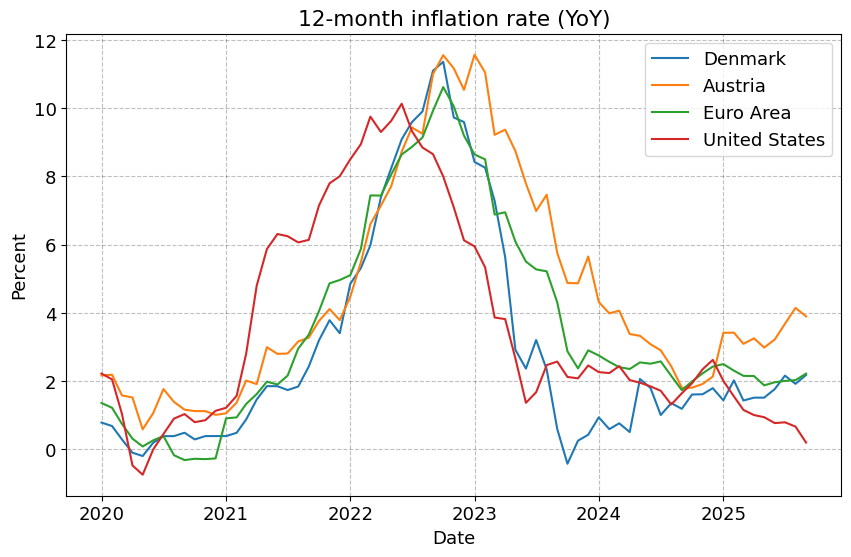

In [ ]:
# Connecting to FRED  
fred = Fred(api_key="60c118ce211cbc54a03242bbf7dc7c19")

# Defining FRED series IDs  
fred_ids = {
    "Denmark":        "CP0000DKM086NEST",   # HICP (monthly)
    "Austria":        "CP0000ATM086NEST",   # HICP
    "Euro Area":      "CP0000EZ19M086NEST", # HICP (EA19 – Euro area)
    "United States":  "CP0000USM086NEST"    # HICP (for US in FRED; alternatively use CPIAUCSL)
}
# Fetching data and combining into a single DataFrame (long format)
dfs = []
for country, sid in fred_ids.items():
    s = fred.get_series(sid, observation_start="2019-01-01")  # returns pandas.Series
    df = s.rename("value").to_frame().reset_index().rename(columns={"index": "date"})
    df["country"] = country
    dfs.append(df)

hicp_long = pd.concat(dfs, ignore_index=True).sort_values(["country", "date"]).reset_index(drop=True)

# Converting to wide format 
hicp_wide = hicp_long.pivot(index="date", columns="country", values="value").sort_index()

# Normalizing to 2019 = 100
def norm_2019(g):
    base = g.loc[g.index.year == 2019].mean()   # average for 2019
    return g / base * 100

hicp_2019 = hicp_wide.groupby(axis=1, level=0).apply(norm_2019)
hicp_2019 = hicp_2019.loc[hicp_2019.index >= "2019-01-01"]

# Computing 12-month inflation (YoY) 
hicp_yoy = hicp_wide.pct_change(12) * 100
hicp_yoy = hicp_yoy.loc[hicp_yoy.index >= "2019-01-01"]

# Plot: Indices (2019 = 100)  
plt.figure(figsize=(10,6))
for col in ["Denmark", "Austria", "Euro Area", "United States"]:
    plt.plot(hicp_2019.index, hicp_2019[col], label=col)
plt.title("HICP (All items), normalized to 2019 = 100")
plt.xlabel("Date"); plt.ylabel("Index (2019 = 100)")
plt.legend(); plt.grid(True)
plt.show()

# Plot: 12-month inflation (YoY)  
plt.figure(figsize=(10,6))
for col in ["Denmark", "Austria", "Euro Area", "United States"]:
    plt.plot(hicp_yoy.index, hicp_yoy[col], label=col)
plt.title("12-month inflation rate (YoY)")
plt.xlabel("Date"); plt.ylabel("Percent")
plt.legend(); plt.grid(True)
plt.show()


**Note to the first figure:** 
The indices are normalized so that the average level during 2019 equals 100. Individual months in 2019 may deviate slightly above or below 100, but the overall mean for the year is set as the baseline.

**Task 2.2.3**

In [27]:
# Prepare yearly statistics 
inflation = hicp_yoy.copy()
inflation['year'] = inflation.index.year

# Min, max, mean per country and year
stats_by_year = (
    inflation.groupby('year')[["Denmark","Austria","Euro Area","United States"]]
    .agg(['min','max','mean'])
    .round(2)
)

print("Yearly min, max, and mean 12-month inflation rates for each country")
display(stats_by_year)

# Overall (since 2019)
overall_stats = (
    hicp_yoy[["Denmark","Austria","Euro Area","United States"]]
    .agg(['min','max','mean'])
    .round(2)
)

print("\nOverall min, max, and mean since 2019")
display(overall_stats)


Yearly min, max, and mean 12-month inflation rates for each country


country Denmark              Austria              Euro Area               \
            min    max  mean     min    max  mean       min    max  mean   
year                                                                       
2019        NaN    NaN   NaN     NaN    NaN   NaN       NaN    NaN   NaN   
2020      -0.19   0.79  0.33    0.59   2.19  1.39     -0.31   1.36  0.26   
2021       0.39   3.79  1.94    1.06   4.11  2.76      0.91   4.96  2.59   
2022       4.85  11.36  8.51    4.48  11.55  8.59      5.11  10.62  8.36   
2023      -0.42   8.43  3.44    4.87  11.57  7.78      2.37   8.64  5.46   
2024       0.51   2.06  1.27    1.81   4.32  2.93      1.74   2.75  2.36   
2025       1.43   2.18  1.77    2.98   4.15  3.46      1.88   2.50  2.14   

country United States               
                  min    max  mean  
year                                
2019              NaN    NaN   NaN  
2020            -0.74   2.22  0.77  
2021             1.22   8.01  5.33  
2022             6.13  10.13  8.69  
2023             1.37   5.95  3.03  
2024             1.32   2.62  2.03  
2025             0.20   2.01  1.01


Overall min, max, and mean since 2019


country,Denmark,Austria,Euro Area,United States
min,-0.42,0.59,-0.31,-0.74
max,11.36,11.57,10.62,10.13
mean,2.93,4.53,3.59,3.59


**Cross-Country Differences in Inflation Since 2019**

The figure and summary statistics reveal that inflation across Denmark, Austria, the Euro Area, and the United States followed broadly similar paths, but with notable differences in timing and magnitude.

In 2020, inflation briefly declined in all economies due to the COVID-19 lockdowns. Average inflation rates were close to zero or slightly positive, ranging from –0,7 % in the United States to around 1 % in Austria.

During 2021–2022, inflation accelerated sharply in response to supply-chain disruptions and energy price shocks. Austria experienced the highest peak, exceeding 11,5 %. All countries inflation rate peaked in 2022 and United States inflation fell more quickly afterward.

From 2023 onward, inflation declined across all regions as energy prices normalized and monetary policy tightened. By 2024–2025, inflation had converged toward 1–3 % in most countries, consistent with central-bank targets.  

Overall, the inflation paths were synchronized but not identical: the U.S. inflation spike occurred earlier and subsided faster, while Austria and the Euro Area faced more persistent price pressures through late 2023.